In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df_housing_org = pd.read_csv('housing.csv')
df_housing_org

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df_housing_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5   6.5750   505 non-null    float64
 6   65.20    505 non-null    float64
 7   4.0900   505 non-null    float64
 8   1        505 non-null    int64  
 9   296.0    505 non-null    float64
 10  15.30    505 non-null    float64
 11  396.90   505 non-null    float64
 12  4.98     505 non-null    float64
 13  24.00    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [4]:
df_housing_org.describe()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
x = df_housing_org.iloc[:,[-3,-5]]
df_housing_org.iloc[:,[-3,-5]] = pd.DataFrame(MinMaxScaler().fit_transform(x))
df_housing_org.describe()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,0.422632,18.461782,0.898367,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,0.321813,2.162520,0.230389,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,0.000000,12.600000,0.000000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,0.175573,17.400000,0.945610,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,0.272901,19.100000,0.986207,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,0.914122,20.200000,0.998260,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.000000,22.000000,1.000000,37.970000,50.000000


In [6]:
df_housing_org.duplicated().sum()

np.int64(0)

In [7]:
X = df_housing_org.iloc[:,:-1]
y = df_housing_org.iloc[:,-1]
y

0      21.6
1      34.7
2      33.4
3      36.2
4      28.7
       ... 
500    22.4
501    20.6
502    23.9
503    22.0
504    11.9
Name: 24.00, Length: 505, dtype: float64

In [8]:
results_dict = {}
for i in range(1,6):
  poly = PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  results_dict[i] = {'r2': r2, 'mae': mae, 'mse': mse, 'rmse': rmse}

In [9]:
pd.DataFrame(results_dict)

,1,2,3,4,5
r2,0.652220,0.834257,-636.791767,-41.117930,-27.241635
mae,3.186787,2.230437,117.658451,26.901839,19.549041
mse,19.379041,9.235566,35539.132727,2346.901876,1573.684806
rmse,4.402163,3.039007,188.518256,48.444833,39.669696


In [10]:
sizes = np.linspace(start=3, stop=len(X_train), num=20)
sizes = sizes.astype(int)
sizes


array([  3,  24,  45,  66,  87, 108, 129, 150, 171, 192, 214, 235, 256,
       277, 298, 319, 340, 361, 382, 404])

In [11]:
test_r2_score = []
train_r2_score = []
for size in sizes:
  poly = PolynomialFeatures(degree=2, include_bias=False)
  X_poly = poly.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train[:size], y_train[:size])
  y_pred = lr.predict(X_test)
  train_r2_score.append(r2_score(y_train[:size], lr.predict(X_train[:size])))
  test_r2_score.append(r2_score(y_test, y_pred))

print(test_r2_score)
print(train_r2_score)

[0.32069365453428134, -20.277495113892027, -15.061070272608891, -101.21739263142891, -59.55833109756, -19.178904116502864, -4.032436070337671, -1.1798248785015781, -0.3775669665638064, -5.505987471887243, -3.5797320464430458, -1.5317834421771601, -0.8498716156579997, 0.6984501524257933, 0.7296278919404712, 0.7595801219644919, 0.8133148060186604, 0.8030495574764134, 0.8259422332090087, 0.8342568407926247]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.9984996795852068, 0.9889128773792247, 0.9774460250821386, 0.9720792509034312, 0.9692176299736114, 0.9645839969974865, 0.9475031880601522, 0.9466081740017002, 0.9434197839994857, 0.9394914658202517, 0.9403683808643134, 0.9384626396042942, 0.9350107928917699, 0.9365342514561268, 0.9340313859280018]


Text(0, 0.5, 'r2 score')

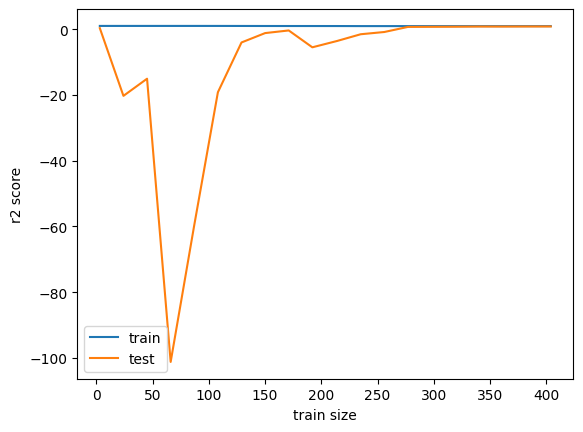

In [12]:
plt.plot(sizes, np.array(train_r2_score), label='train')
plt.plot(sizes, np.array(test_r2_score), label='test')
plt.legend()
plt.xlabel('train size')
plt.ylabel('r2 score')

In [13]:
from sklearn.linear_model import Lasso
X = df_housing_org.iloc[:,:-1]
y = df_housing_org.iloc[:,-1]
poly_lasso = PolynomialFeatures(degree=2, include_bias=False)
X = poly_lasso.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
lasso_mdl_reg = Lasso(alpha=35, max_iter=100000, tol=0.001)
lasso_mdl_reg.fit(X_train, y_train)
print(lasso_mdl_reg.score(X_train, y_train))
print(lasso_mdl_reg.score(X_test, y_test))

0.7120245783361361
0.6781396689014456


In [14]:
from sklearn.linear_model import Ridge
X = df_housing_org.iloc[:,:-1]
y = df_housing_org.iloc[:,-1]
poly_ridge = PolynomialFeatures(degree=2, include_bias=False)
X = poly_ridge.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
ridge_mdl_reg = Ridge(alpha=25, max_iter=100000, tol=0.001)
ridge_mdl_reg.fit(X_train, y_train)
print(ridge_mdl_reg.score(X_train, y_train))
print(ridge_mdl_reg.score(X_test, y_test))

0.9178951338933559
0.8208979524658637
